In [1]:
import json
from App.classes.Line import Line

track = json.load(open('shapefiles/gold_northbound/goldJSON.json'))
stations = json.load(open('misc/GoldLineStationIds.json'))['items']

gold_line = Line(804, track, stations, None)
gold_line.stations.head()

,display_name,id,geometry,relative_position,line_id,station_id
0,Atlantic Station,80401,POINT (-118.15447 34.0333999),0.002717,804,1
1,East La Civic Center Station,80402,POINT (-118.16121 34.0333599),0.015767,804,2
2,Maravilla Station,80403,POINT (-118.16814 34.0333199),0.029182,804,3
3,Indiana Station,80404,POINT (-118.19218 34.0342999),0.077257,804,4
4,Soto Station,80405,POINT (-118.21006 34.0437499),0.117908,804,5


In [2]:
import pandas as pd
analyzed = pd.read_csv('analysis_window_tracked.csv')

In [3]:
analyzed.head()

,Unnamed: 0,vehicle_id,lat,lon,direction,datetime,geometry,relative_position,previous_stop,next_stop,trip_id
0,238,401,34.047861,-118.229378,180,2018-08-29 12:02:06,POINT (-118.229378 34.047861),0.156798,Little Tokyo / Arts District Station,Pico / Aliso Station,1.0
1,250,401,34.046044,-118.216283,180,2018-08-29 12:05:59,POINT (-118.216283 34.046044),0.130776,Mariachi Plaza / Boyle Heights Station,Soto Station,1.0
2,262,401,34.036903,-118.194480,180,2018-08-29 12:08:44,POINT (-118.19448 34.036903),0.084960,Soto Station,Indiana Station,1.0
3,274,401,34.036903,-118.194480,180,2018-08-29 12:11:44,POINT (-118.19448 34.036903),0.084960,Soto Station,Indiana Station,1.0
4,286,401,34.033376,-118.173907,180,2018-08-29 12:14:24,POINT (-118.173907 34.0333759),0.040350,Indiana Station,Maravilla Station,1.0


In [4]:
from datetime import timedelta
pd.to_datetime('08/29/18 00:00:00') + timedelta(days=54)
analyzed.loc[:,'datetime'] = analyzed.datetime.apply(lambda dt: pd.to_datetime(dt) + timedelta(days=54))
analyzed.head()

,Unnamed: 0,vehicle_id,lat,lon,direction,datetime,geometry,relative_position,previous_stop,next_stop,trip_id
0,238,401,34.047861,-118.229378,180,2018-10-22 12:02:06,POINT (-118.229378 34.047861),0.156798,Little Tokyo / Arts District Station,Pico / Aliso Station,1.0
1,250,401,34.046044,-118.216283,180,2018-10-22 12:05:59,POINT (-118.216283 34.046044),0.130776,Mariachi Plaza / Boyle Heights Station,Soto Station,1.0
2,262,401,34.036903,-118.194480,180,2018-10-22 12:08:44,POINT (-118.19448 34.036903),0.084960,Soto Station,Indiana Station,1.0
3,274,401,34.036903,-118.194480,180,2018-10-22 12:11:44,POINT (-118.19448 34.036903),0.084960,Soto Station,Indiana Station,1.0
4,286,401,34.033376,-118.173907,180,2018-10-22 12:14:24,POINT (-118.173907 34.0333759),0.040350,Indiana Station,Maravilla Station,1.0


### Vehicles and Stations plotted:

In [5]:
northbound = analyzed.loc[analyzed['direction'] == 0.]
southbound = analyzed.loc[analyzed['direction'] == 180.]
station_distances = gold_line.stations['relative_position']

In [6]:
schedule = pd.read_csv('analysis_window_schedule.csv', parse_dates=['datetime'])

schedule_northbound = schedule[schedule['stop_headsign'] == '804 - Azusa / Citrus']
schedule_southbound = schedule[schedule['stop_headsign'] == '804 - Atlantic Station']
schedule_northbound.head()

,Unnamed: 0,index,datetime,trip_id,arrival_time,departure_time,stop_id,station_id,display_name,stop_headsign,relative_position,geometry
1,1,7,2018-10-22 13:30:00,46668492,13:30:00,13:30:00,80409,9,Union Station - Metro Gold Line,804 - Azusa / Citrus,0.191207,POINT (-118.23476 34.0560599)
3,3,9,2018-10-22 16:08:00,46668494,16:08:00,16:08:00,80409,9,Union Station - Metro Gold Line,804 - Azusa / Citrus,0.191207,POINT (-118.23476 34.0560599)
6,6,21,2018-10-22 13:42:00,46668508,13:42:00,13:42:00,80409,9,Union Station - Metro Gold Line,804 - Azusa / Citrus,0.191207,POINT (-118.23476 34.0560599)
8,8,23,2018-10-22 16:22:00,46668510,16:22:00,16:22:00,80409,9,Union Station - Metro Gold Line,804 - Azusa / Citrus,0.191207,POINT (-118.23476 34.0560599)
10,10,43,2018-10-22 14:18:00,46668536,14:18:00,14:18:00,80409,9,Union Station - Metro Gold Line,804 - Azusa / Citrus,0.191207,POINT (-118.23476 34.0560599)


In [14]:
schedule.datetime.head()

0   2018-10-22 12:37:00
1   2018-10-22 13:30:00
2   2018-10-22 15:13:00
3   2018-10-22 16:08:00
4   2018-10-22 17:49:00
Name: datetime, dtype: datetime64[ns]

In [10]:
analyzed.datetime.head()

0   2018-10-22 12:02:06
1   2018-10-22 12:05:59
2   2018-10-22 12:08:44
3   2018-10-22 12:11:44
4   2018-10-22 12:14:24
Name: datetime, dtype: datetime64[ns]

In [8]:
from App.classes.Visualizer import Marey

northPlot = Marey(gold_line.stations, pd.to_datetime('10/22/18 12:00:00'), pd.to_datetime('10/22/18 18:00:00'), northbound, schedule_northbound)
#southPlot = Marey(gold_line.stations, start_date, end_date, southbound, schedule_southbound)

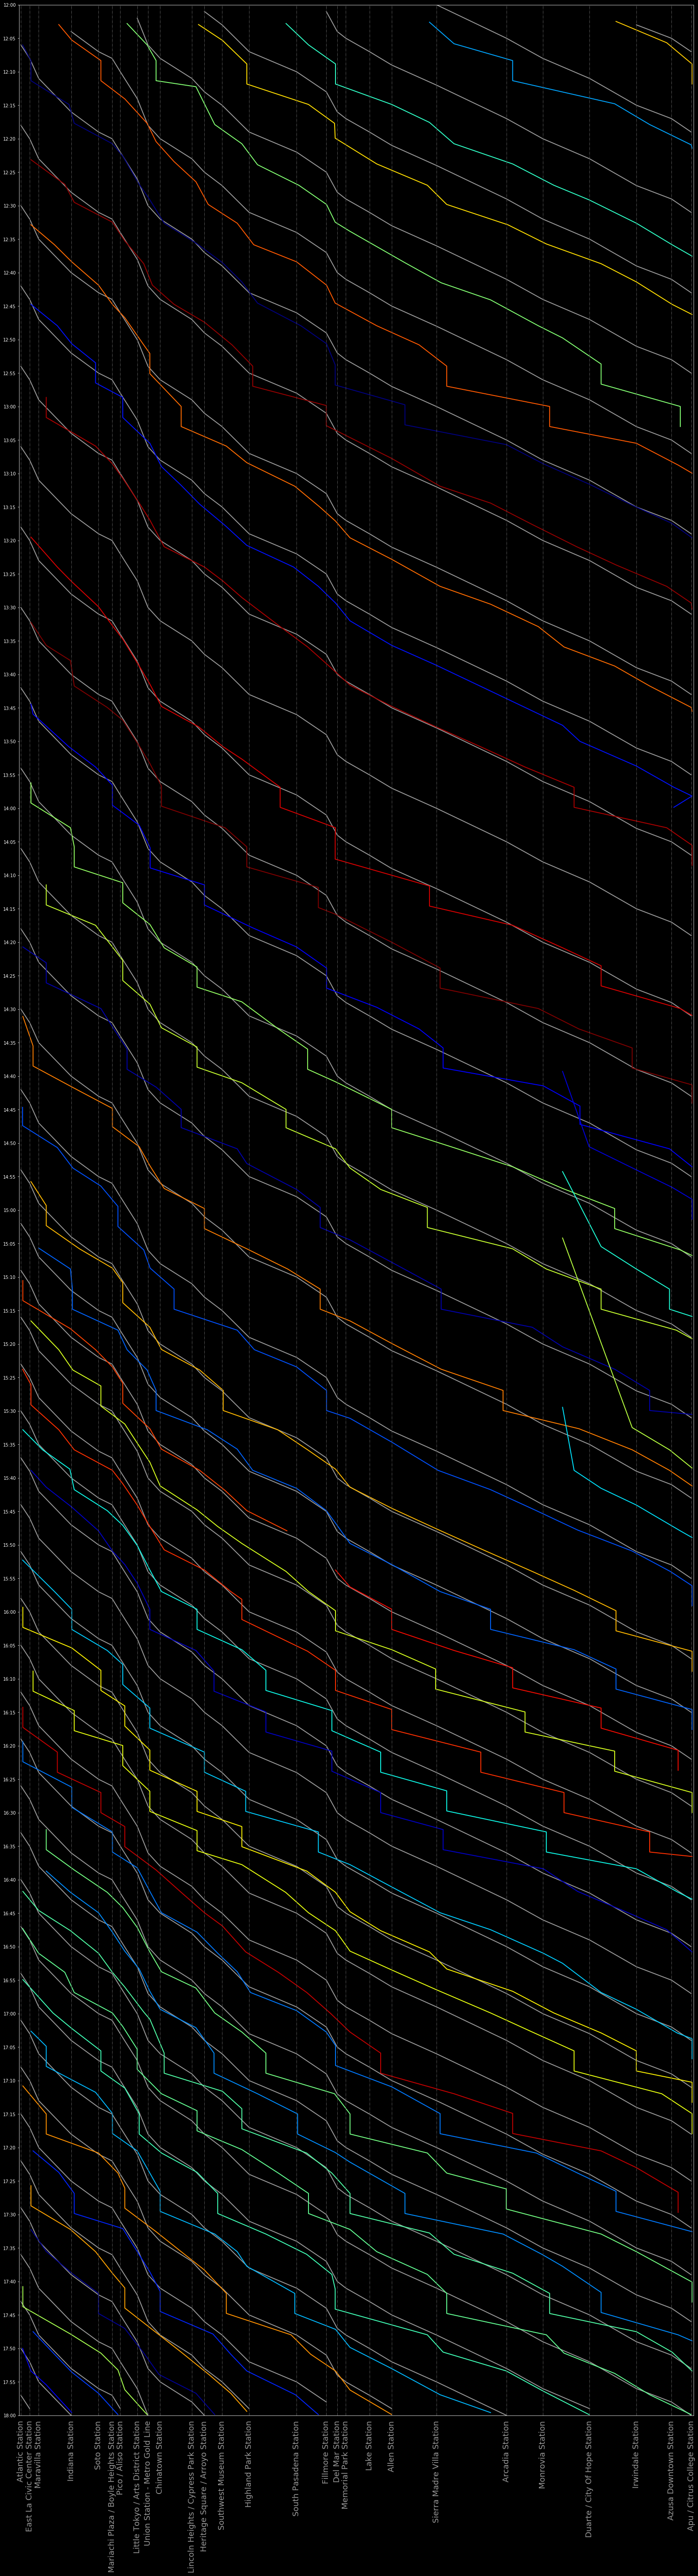

In [9]:
northPlot.plot()